Here is where the comparison of clustering before and after the PCA has been completed will take place.
As always we load in all the libraries we will use.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

We need to load our original .csv and our PCA transformed dataset.

In [10]:
original_df = pd.read_csv('simulated_health_wellness_data.csv')
pca_df = pd.read_csv('principal_components.csv')

We want know know how the structures of the datasets compare to each other, we do this through the following.

In [11]:
print(f"Original Dataset Dimensions: {original_df.shape}")
print(f"PCA-Transformed Dataset Dimensions: {pca_df.shape}")

Original Dataset Dimensions: (200, 5)
PCA-Transformed Dataset Dimensions: (200, 2)


We want to know how the basic information for the datasets compare.

In [12]:
print("\nOriginal Dataset Statistics:\n", original_df.describe())
print("\nPCA-Reduced Dataset Statistics:\n", pca_df.describe())


Original Dataset Statistics:
        Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723               2.000000               5.967243   
50%            29.958081               3.000000               6.972331   
75%            35.008525               4.000000               7.886509   
max            57.201692               9.000000              10.708419   

       Stress_Level         BMI  
count    200.000000  200.000000  
mean       4.995000   25.150008  
std        2.605556    5.070778  
min        1.000000   12.502971  
25%        3.000000   21.458196  
50%        5.000000   25.155662  
75%        7.000000   28.011155  
max        9.000000   37.89854

We will now build the correlation matrices. we do this by building the matrix for each dataset and siplay them next to each other.

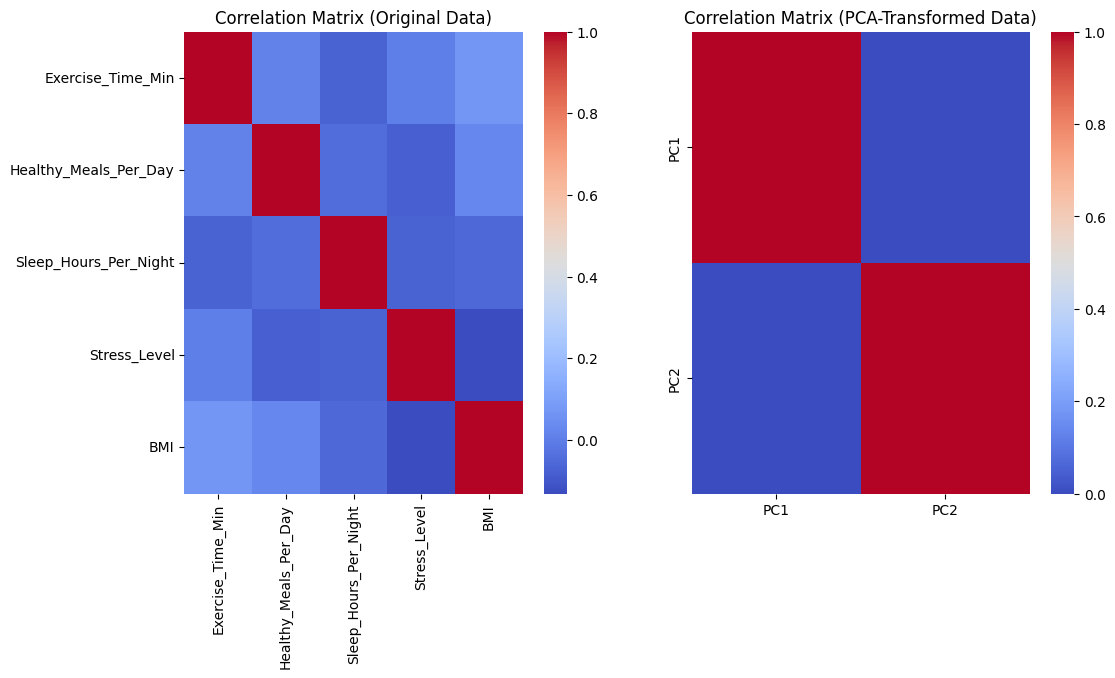

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(original_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (Original Data)")

plt.subplot(1, 2, 2)
sns.heatmap(pca_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (PCA-Transformed Data)")

plt.show()

We want to make sure that we have both datasets standardized so that they are on the same scale. We do this while ensuring that we only use numerical values.

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(original_df.select_dtypes(include=['number']))

We will need apply PCA to the orginal dataset so we can analyze the explanation for the variance.

In [15]:
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_

Now we set up the plots for the explained variance.

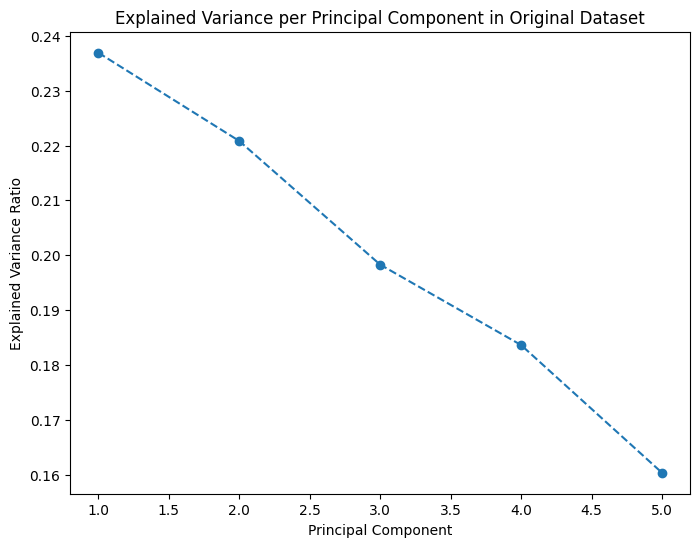

In [16]:
# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component in Original Dataset')
plt.show()